# Text vectorisation: Turning Text into Features

More advanced forms of text analysis require that text documents are converted into numerical values or features. In this  section we will examine:

* different methods for representing a collection of texts as numbers
* the decisions we need to make when generating a particular representation as well as the kinds of insights each numerical representation can give us.

We will use tools from the libraries `scikit-learn` and `gensim` to perform some popular text-to-feature methods:
* Re-cap of unigram and bi-gram features
* TF-IDF features
* Word embedding (word2vec) features

In [630]:
# Import libraries

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import gensim
from gensim.models import Word2Vec

from matplotlib import pyplot as plt

## Turning text into n-grams features 
### Unigrams

Compute the friquency of word occurance using count vectoriser in `scikit-learn`  

### Toy example

In [589]:
# Text corpus

# Load the parsed news dataset 
corpus = pd.read_csv('sample_news_large_phrased.csv', index_col='index')


In [590]:
corpus.head(1)

,query,title,text,published,site,tokens
index,,,,,,
0,Hong Kong,Horrifying view of fires from space,"Video Image Satellite images show insane view of NSW fires from space Satellite images show the huge amount of smoke billowing from a number of bushfires across NSW.\nThe NSW fires, as seen from s...",2019-11-08T23:51:00.000+02:00,news.com.au,video|*|image|*|satellite|*|image|*|insane|*|view|*|nsw|*|fire|*|space|*|satellite|*|image|*|huge|*|smoke|*|billow|*|number|*|bushfire|*|nsw|*|nsw|*|fire|*|space|*|source|*|twitter|*|startling|*|s...


In [591]:
# Subset news stories about brexit
corpus_brexit = news[news['query']=='brexit']

corpus_toy=news_brexit.iloc[[7,22], [1]]

# Set the maximum width of columns
pd.options.display.max_colwidth = 200

corpus_toy.head(20)

,title
index,
132,Brexit news: Gina Miller unveils new Remainer plot to block Brexit in general election | UK | News | Express.co.uk
147,Brexit news: Labour pledge to continue ‘freedom of movement’ infuriates Leavers | UK | News | Express.co.uk


In [592]:
# Use CountVectorizer to tokenize a collection of text documents and convert it into a matrix of token counts

# Create an instance of the CountVectorizer class
vectorizer = CountVectorizer()

# Learn the vocabulary from the corpus
vectorizer.fit(corpus_toy['title'])

# encode documents as vectors
vector = vectorizer.transform(corpus_toy['title'])

# The vectoriser builds a dictionary of terms (keys) and indices (values)
print(vectorizer.vocabulary_)


{'brexit': 1, 'news': 16, 'gina': 8, 'miller': 13, 'unveils': 23, 'new': 15, 'remainer': 20, 'plot': 19, 'to': 21, 'block': 0, 'in': 9, 'general': 7, 'election': 4, 'uk': 22, 'express': 5, 'co': 2, 'labour': 11, 'pledge': 18, 'continue': 3, 'freedom': 6, 'of': 17, 'movement': 14, 'infuriates': 10, 'leavers': 12}


Note that punctuation and single letter's words are removed. We will use below the prerpocessed tokens you have already preprocessed.

In [593]:
# Access the feature index of a token
vectorizer.vocabulary_.get('brexit')

1

The numbers assigned to each token (e.g., "brexit") are indices. For clarity, indices are sorted in the cell bellow.

In [594]:
print(vector.toarray())

[[1 2 1 0 1 1 0 1 1 1 0 0 0 1 0 1 2 0 0 1 1 1 2 1]
 [0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 2 1 1 0 0 1 2 0]]


`vector.toarray()` returns a matrix where the rows indicate the number of documents (two in our case) and the columns indicate the size of the vocabulary of the entire corpus (all documents).

Each document is encoded as a vector with a length indicating the size of the vocabulary of the entire corpus and an integer count for the number of times each token appeared in the document.

In [595]:
# Sort the dictionary of terms (keys) and indices (values) in the feature matrix by values in ascending order
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vector.toarray())

{'block': 0, 'brexit': 1, 'co': 2, 'continue': 3, 'election': 4, 'express': 5, 'freedom': 6, 'general': 7, 'gina': 8, 'in': 9, 'infuriates': 10, 'labour': 11, 'leavers': 12, 'miller': 13, 'movement': 14, 'new': 15, 'news': 16, 'of': 17, 'pledge': 18, 'plot': 19, 'remainer': 20, 'to': 21, 'uk': 22, 'unveils': 23}
[[1 2 1 0 1 1 0 1 1 1 0 0 0 1 0 1 2 0 0 1 1 1 2 1]
 [0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 2 1 1 0 0 1 2 0]]


The output consists of 24 unigram features. The 1st token `brexit` has appeared twice in the first title and once in the second title.

In [596]:
# Find the most friquent token in the corpus and the number of times it appeared in the corpus 
maximum = vector.toarray().max()
index_of_maximum = np.where(vector.toarray() == maximum)

print("max:", maximum)
print("index:", index_of_maximum)

max: 2
index: (array([0, 0, 0, 1, 1]), array([ 1, 16, 22, 16, 22]))


In [597]:
# Sort the vector of integer count in ascending order
np.sort(vector.toarray())

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2]])

### Example using the entire data set of News Tokens

In [598]:
corpus['text']

index
0      Video Image Satellite images show insane view of NSW fires from space Satellite images show the huge amount of smoke billowing from a number of bushfires across NSW.\nThe NSW fires, as seen from s...
1      \n Chief Executive addresses the press after citywide chaos and transport disruptions \n Earlier, police shoot protester leaving him in intensive care, while separately, a man is set on fire durin...
2      Hong Kong (CNN) China has announced a curfew on online gaming for minors among new measures aimed at curbing video game addiction.\nThe official government guidelines will be applied to all online...
3      Washington (CNN) President Donald Trump was relentlessly dishonest last week about the scandal over his dealings with Ukraine, making false claims about just about every component of the story.\nT...
4      (CNN) — What is bread? You likely don't have to think for long, and whether you're hungry for a slice of sourdough or craving some tortillas, what you imagine 

In [599]:
# Convert a collection of text documents to a matrix of token counts

vectorizer_corpus = CountVectorizer()

#  Learn the vocabulary from the corpus and tokenise
vectorizer_corpus.fit(corpus['text'])

# encode documents as vectors
vector_corpus = vectorizer.transform(corpus['text'])

# summarize & generate output
print(vectorizer_corpus.vocabulary_)
print(vector_corpus.toarray())

{'video': 13711, 'image': 6501, 'satellite': 11132, 'images': 6503, 'show': 11549, 'insane': 6752, 'view': 13714, 'of': 8905, 'nsw': 8806, 'fires': 5254, 'from': 5525, 'space': 11914, 'the': 12823, 'huge': 6390, 'amount': 912, 'smoke': 11781, 'billowing': 1715, 'number': 8822, 'bushfires': 2147, 'across': 573, 'as': 1193, 'seen': 11310, 'source': 11895, 'twitter': 13319, 'startling': 12117, 'currently': 3494, 'ravaging': 10344, 'australia': 1316, 'east': 4384, 'coast': 2773, 'are': 1122, 'clearly': 2716, 'visible': 13748, 'with': 14103, 'hundreds': 6415, 'kilometres': 7251, 'pacific': 9179, 'ocean': 8896, '7pm': 413, 'on': 8954, 'saturday': 11139, 'three': 12897, 'people': 9400, 'dead': 3594, 'five': 5276, 'missing': 8301, '30': 270, 'injured': 6729, 'and': 944, 'more': 8413, 'than': 12814, '150': 100, 'homes': 6306, 'have': 6112, 'been': 1585, 'destroyed': 3873, 'by': 2172, 'wild': 14058, 'razing': 10351, 'drought': 4299, 'stricken': 12280, 'timelapse': 12949, 'imagery': 6502, 'shared

# Exercise 1

For the entire corpus, find the most friquent token in the corpus and the number of times it appeared in the corpus. 

In [600]:
# Please write below the code for Exercise 1




### Bi-grams (combination of two tokens)
In the unigram transformation, each token is a feature. For example, `general` and `election` are two separate features. The bi-gram transformation relaxes this contrain by pairing each word to previous and subsequent words.  

In [601]:
# Extracting unigrams and bigrams
    # ngram_range of (1, 1) extracts unigrams
    # ngram_range of (1, 2) extracts unigrams and bigrams
    # ngram_range of (1, 2) extracts bigrams

# Create an instance of the CountVectorizer class set bigram extraction   
vectorizer = CountVectorizer(ngram_range=(2,2))

# Learn the vocabulary from the corpus and tokenise
vectorizer.fit(corpus_toy['title'])

# encode documents as vectors
vector = vectorizer.transform(corpus_toy['title'])

# output as a dictionary of terms (keys) and indices (values) in the feature matrix
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vector.toarray())

{'block brexit': 0, 'brexit in': 1, 'brexit news': 2, 'co uk': 3, 'continue freedom': 4, 'election uk': 5, 'express co': 6, 'freedom of': 7, 'general election': 8, 'gina miller': 9, 'in general': 10, 'infuriates leavers': 11, 'labour pledge': 12, 'leavers uk': 13, 'miller unveils': 14, 'movement infuriates': 15, 'new remainer': 16, 'news express': 17, 'news gina': 18, 'news labour': 19, 'of movement': 20, 'pledge to': 21, 'plot to': 22, 'remainer plot': 23, 'to block': 24, 'to continue': 25, 'uk news': 26, 'unveils new': 27}
[[1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1]
 [0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0]]


The output consists of 28 bigram-based features. The count is either 1 or 0 for each of our bigram.     

##  Term frequency–inverse document frequency (TF-IDF)

TF-IDF vectorisation weights down tokens that are present across many documents in the corpus (in particular, words like "of" and "the" if stop words are not removed) and are therefore less informative than tokens that are present in specific documents in the corpus. 

### Toy example

In [602]:
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer()

# Learn the vocabulary from the corpus and tokenise
vectorizer.fit(corpus_toy['title'])

# Summarize & print the tokens and the matrix of TF-IDF features 
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vectorizer.idf_)

{'block': 0, 'brexit': 1, 'co': 2, 'continue': 3, 'election': 4, 'express': 5, 'freedom': 6, 'general': 7, 'gina': 8, 'in': 9, 'infuriates': 10, 'labour': 11, 'leavers': 12, 'miller': 13, 'movement': 14, 'new': 15, 'news': 16, 'of': 17, 'pledge': 18, 'plot': 19, 'remainer': 20, 'to': 21, 'uk': 22, 'unveils': 23}
[1.40546511 1.         1.         1.40546511 1.40546511 1.
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.         1.40546511
 1.40546511 1.40546511 1.40546511 1.         1.         1.40546511]


###### How is TF-IDF computed by `scikit-learn`?  

In [603]:
# TF-IDF = log(1 + N/ 1 + n) + 1 
# N is the total number of documents 
# n is the number of documents in which the word appears
# constant “1” is added to the numerator and denominator to prevent zero divisions
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    
import math as maths
# the term "brexit" is present in two of two documents
maths.log((2+1)/(2+1))+1 

1.0

In [604]:
# the term "election" is present in one of two documents
math.log((2+1)/(1+1))+1

1.4054651081081644

#### TF-IDF vectorisation of the `row` news sub-corpus related to Brexit

In [610]:
# Convert our corpus of row documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer()

# Learn the vocabulary from the corpus and tokenise
vectorizer.fit(corpus_brexit['text'])

# Summarize & print the tokens and the matrix of TF-IDF features
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vectorizer.idf_)

{'00': 0, '000': 1, '0010': 2, '0044': 3, '01': 4, '020': 5, '05': 6, '056': 7, '05am': 8, '06': 9, '07': 10, '08': 11, '0800': 12, '0944': 13, '10': 14, '100': 15, '10am': 16, '10pm': 17, '11': 18, '115': 19, '11th': 20, '12': 21, '12bn': 22, '13': 23, '13am': 24, '14': 25, '15': 26, '150': 27, '158': 28, '16': 29, '166': 30, '17': 31, '18': 32, '19': 33, '190': 34, '1939': 35, '1940': 36, '1956': 37, '1966': 38, '1969': 39, '1978': 40, '1979': 41, '1982': 42, '1983': 43, '1984': 44, '1985': 45, '1991': 46, '1993': 47, '1995': 48, '1998': 49, '20': 50, '2000': 51, '2003': 52, '2006': 53, '2009': 54, '2010': 55, '2012': 56, '2013': 57, '2016': 58, '2017': 59, '2019': 60, '2020': 61, '2021': 62, '2027': 63, '207': 64, '21': 65, '218': 66, '22': 67, '23': 68, '24': 69, '25': 70, '25c': 71, '268': 72, '27': 73, '277': 74, '28': 75, '29': 76, '299': 77, '2am': 78, '30': 79, '306': 80, '308': 81, '30am': 82, '30pm': 83, '31': 84, '322': 85, '329': 86, '33': 87, '3490': 88, '35': 89, '37': 9

In [611]:
# TF-IDF of the token "the" in the brexit corpus
print("TF-IDF score of the term 'the':",vectorizer.idf_[vectorizer.vocabulary_["the"]])
print("Mean TF-IDF in corpus:", np.mean(vectorizer.idf_))

TF-IDF score of the term 'the': 1.0800427076735364
Mean TF-IDF in corpus: 3.2954390591304894


In [612]:
# TF-IDF of the token "brexit" in the brexit corpus
print("TF-IDF score of the term 'brexit':",vectorizer.idf_[vectorizer.vocabulary_["brexit"]])
print("Mean TF-IDF in corpus:", np.mean(vectorizer.idf_))

TF-IDF score of the term 'brexit': 1.1226023220923322
Mean TF-IDF in corpus: 3.2954390591304894


In [613]:
# TF-IDF of the token "deal" in the brexit corpus
print("TF-IDF score of the term 'deal':",vectorizer.idf_[vectorizer.vocabulary_["deal"]])
print("Mean TF-IDF in corpus:", np.mean(vectorizer.idf_))

TF-IDF score of the term 'deal': 1.424883193965266
Mean TF-IDF in corpus: 3.2954390591304894


In [614]:
# TF-IDF of the token "protesters" in the brexit corpus
print("TF-IDF score of the term 'protesters':", vectorizer.idf_[vectorizer.vocabulary_["protesters"]])
print("Mean TF-IDF in corpus:", np.mean(vectorizer.idf_))

TF-IDF score of the term 'protesters': 3.159484249353372
Mean TF-IDF in corpus: 3.2954390591304894


The word `"the"` is present in many documents and hence the vector value is close to 1; Converseley, the term `"protesters"` is present in few documents and has a higher vector value. 

#### Let's explore the parameters of the TfidfVectorizer function

In [615]:
# Key parameters of the TfidfVectorizer function
    # min_df: float or int, default=1.0. ignores terms that have a document frequency lower than the given threshold
    # max_df: float or int, default=1.0. ignores terms that have a document frequency higher than the given threshold
    # stop_words: removes stopwords, only for english, with issues; max_df set to a value in the range [0.7, 1.0) 
    # automatically filters stop words based on intra corpus document frequency of terms.

# Convert our corpus of row documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', min_df = 0.2, max_df = 0.9) # threshold depends on corpus and question

# Learn the vocabulary from the corpus and tokenise
vectorizer.fit(corpus_brexit['text'])

# Summarize & print the tokens and the matrix of TF-IDF features
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vectorizer.idf_)

{'10': 0, '12': 1, '2019': 2, '25': 3, '30': 4, '31': 5, 'added': 6, 'agreed': 7, 'agreement': 8, 'argued': 9, 'articles': 10, 'ask': 11, 'asked': 12, 'backing': 13, 'bbc': 14, 'believe': 15, 'boris': 16, 'brexit': 17, 'britain': 18, 'british': 19, 'business': 20, 'called': 21, 'change': 22, 'clear': 23, 'come': 24, 'comments': 25, 'commons': 26, 'conservative': 27, 'countries': 28, 'country': 29, 'day': 30, 'days': 31, 'dead': 32, 'deadline': 33, 'deal': 34, 'debate': 35, 'december': 36, 'decision': 37, 'described': 38, 'despite': 39, 'did': 40, 'different': 41, 'doesn': 42, 'don': 43, 'donald': 44, 'election': 45, 'end': 46, 'eu': 47, 'european': 48, 'extension': 49, 'family': 50, 'free': 51, 'future': 52, 'general': 53, 'getty': 54, 'going': 55, 'good': 56, 'government': 57, 'group': 58, 'half': 59, 'happen': 60, 'happens': 61, 'hard': 62, 'home': 63, 'hours': 64, 'house': 65, 'image': 66, 'including': 67, 'interview': 68, 'jeremy': 69, 'john': 70, 'johnson': 71, 'just': 72, 'know':

In [616]:
# TF-IDF of the token "the" in the brexit corpus
print("TF-IDF score of the term 'the':",vectorizer.idf_[vectorizer.vocabulary_["the"]])
print("Mean TF-IDF in corpus:", np.mean(vectorizer.idf_))

KeyError: 'the'

The word `"the"` appears in more than 90% of the documents and is removed on that basis.   

In [617]:
# TF-IDF of the token "brexit" in the brexit corpus
print("TF-IDF score of the term 'brexit':",vectorizer.idf_[vectorizer.vocabulary_["brexit"]])
print("Mean TF-IDF in corpus:", np.mean(vectorizer.idf_))

TF-IDF score of the term 'brexit': 1.1226023220923322
Mean TF-IDF in corpus: 2.1845818517131215


In [618]:
# TF-IDF of the token "deal" in the brexit corpus
print("TF-IDF score of the term 'deal':",vectorizer.idf_[vectorizer.vocabulary_["deal"]])
print("Mean TF-IDF in corpus:", np.mean(vectorizer.idf_))

TF-IDF score of the term 'deal': 1.424883193965266
Mean TF-IDF in corpus: 2.1845818517131215


In [619]:
# TF-IDF of the token "election" in the brexit corpus
print("TF-IDF score of the term 'election':", vectorizer.idf_[vectorizer.vocabulary_["protesters"]])
print("Mean TF-IDF in corpus:", np.mean(vectorizer.idf_))

KeyError: 'protesters'

The word `"protesters"` appears in less than 20% of the documents and is removed on that basis.

#### TF-IDF vectorisation using the `tokenied` News sub-corpus related to Brexit

In [620]:
vectorizer = TfidfVectorizer(stop_words='english', min_df = 0.2, max_df = 0.9) # threshold depends on corpus and question
#Tokenize and build vocab
vectorizer.fit(corpus_brexit['tokens'])
#Summarize
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vectorizer.idf_)

{'accuse': 0, 'act': 1, 'add': 2, 'agree': 3, 'agreement': 4, 'allow': 5, 'announce': 6, 'argue': 7, 'ask': 8, 'attack': 9, 'attempt': 10, 'bbc': 11, 'believe': 12, 'big': 13, 'boris_johnson': 14, 'break': 15, 'brexit': 16, 'brexit_deal': 17, 'britain': 18, 'british': 19, 'business': 20, 'campaign': 21, 'carry': 22, 'change': 23, 'claim': 24, 'clear': 25, 'close': 26, 'come': 27, 'comment': 28, 'commons': 29, 'conservative': 30, 'continue': 31, 'country': 32, 'day': 33, 'dead': 34, 'deadline': 35, 'deal': 36, 'debate': 37, 'december': 38, 'decision': 39, 'demand': 40, 'despite': 41, 'die': 42, 'different': 43, 'drive': 44, 'early': 45, 'election': 46, 'end': 47, 'eu': 48, 'european': 49, 'european_union': 50, 'extension': 51, 'extra': 52, 'face': 53, 'family': 54, 'feel': 55, 'force': 56, 'free': 57, 'future': 58, 'general_election': 59, 'good': 60, 'government': 61, 'group': 62, 'half': 63, 'happen': 64, 'hard': 65, 'hold': 66, 'home': 67, 'hope': 68, 'hour': 69, 'house_of_commons': 7

In [621]:
# TF-IDF of the token "the" in the brexit corpus
print("TF-IDF score of the term 'the':",vectorizer.idf_[vectorizer.vocabulary_["the"]])
print("Mean TF-IDF in corpus:", np.mean(vectorizer.idf_))

KeyError: 'the'

In [622]:
# TF-IDF of the token "brexit" in the brexit corpus
print("TF-IDF score of the term 'brexit':", vectorizer.idf_[vectorizer.vocabulary_["brexit"]])
print("Mean TF-IDF in corpus:", np.mean(vectorizer.idf_))

TF-IDF score of the term 'brexit': 1.1226023220923322
Mean TF-IDF in corpus: 2.212401861659014


In [623]:
# TF-IDF of the collocation "deal" in the brexit corpus
print("TF-IDF score of the term 'deal':", vectorizer.idf_[vectorizer.vocabulary_["deal"]])
print("Mean TF-IDF in corpus:", np.mean(vectorizer.idf_))

TF-IDF score of the term 'deal': 1.4855078157817008
Mean TF-IDF in corpus: 2.212401861659014


In [624]:
# TF-IDF of the collocation "prime_minister" in the brexit corpus
print("TF-IDF score of the term 'prime_minister':", vectorizer.idf_[vectorizer.vocabulary_["prime_minister"]])
print("Mean TF-IDF in corpus:", np.mean(vectorizer.idf_))

TF-IDF score of the term 'prime_minister': 1.550046336919272
Mean TF-IDF in corpus: 2.212401861659014


## Word Embeddings and word2vec

> You shall know a word by the company it keeps (Firth, 1957).

`Word2vec` [Mikolov et al. 2013](https://arxiv.org/abs/1301.3781) and related techniques use the context of a given word — i.e., the words surrounding a word — to learn its meaning and represent it as vectors.

In [625]:
# Convert your tokens in the News dataset into a list
corpus_brexit['tokens']= corpus_brexit['tokens'].apply(lambda token_string: token_string.split('|*|'))


<ipython-input-625-148acfbc1404>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_brexit['tokens']= corpus_brexit['tokens'].apply(lambda token_string: token_string.split('|*|'))


In [626]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# training the model
skipgram = Word2Vec(corpus_brexit['tokens'], size =300, window = 3, min_count=1,sg = 1)
#skipgram = Word2Vec([d[1][0:40]+d[0][0:40]], size =300, window = 3, min_count=1,sg = 1)
print(skipgram)
# access vector for one word
print(skipgram['brexit'])

Word2Vec(vocab=2674, size=300, alpha=0.025)
[-2.83995382e-02 -8.54729787e-02 -4.10664268e-02 -4.66321930e-02
 -2.56677419e-02  9.11601409e-02 -2.85437591e-02 -3.60240005e-02
 -1.41552519e-02 -2.31442507e-02  1.92738473e-02  5.46664465e-03
 -2.26770137e-02 -4.21600975e-02 -1.45927677e-02  3.16618346e-02
  4.90065431e-03 -4.61056717e-02  4.07583788e-02  4.53484170e-02
 -1.93214733e-02  3.63129824e-02  2.65787616e-02 -8.71245842e-03
  1.87908765e-02  1.47903292e-02 -3.68385762e-02 -5.58694534e-04
  2.15802379e-02  9.05660260e-03 -2.61431057e-02  1.13691419e-01
  4.21845801e-02 -5.23909740e-02 -8.09826143e-03 -5.78750521e-02
 -2.55159121e-02  3.34418006e-02 -5.79427443e-02 -2.14809701e-02
  2.18339991e-02  5.61647248e-05  7.68776564e-03 -1.54847447e-02
 -1.11025453e-01  3.36271562e-02 -3.92576307e-02  2.68489565e-03
 -3.46043310e-03  3.68880364e-03 -2.68673003e-02  2.59581637e-02
  2.07178704e-02  4.04972509e-02  2.63534263e-02  9.29649640e-03
  3.65179181e-02 -1.11414017e-02 -8.42620712e-

<ipython-input-626-a78572e738f8>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(skipgram['brexit'])


In [627]:
skipgram.wv.similarity('brexit', 'migration')

0.96640587

In [628]:
skipgram.wv.most_similar(positive = "brexit")

[('-pron-', 0.9996480941772461),
 ('uk', 0.999570369720459),
 ('labour', 0.9994709491729736),
 ('party', 0.9994624257087708),
 ('people', 0.9994560480117798),
 ('leave', 0.9994328618049622),
 ('eu', 0.9994255900382996),
 ('government', 0.9994107484817505),
 ('remain', 0.9993991255760193),
 ('time', 0.9993802309036255)]

<ipython-input-631-293fb6932486>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  data = skipgram[skipgram.wv.vocab]


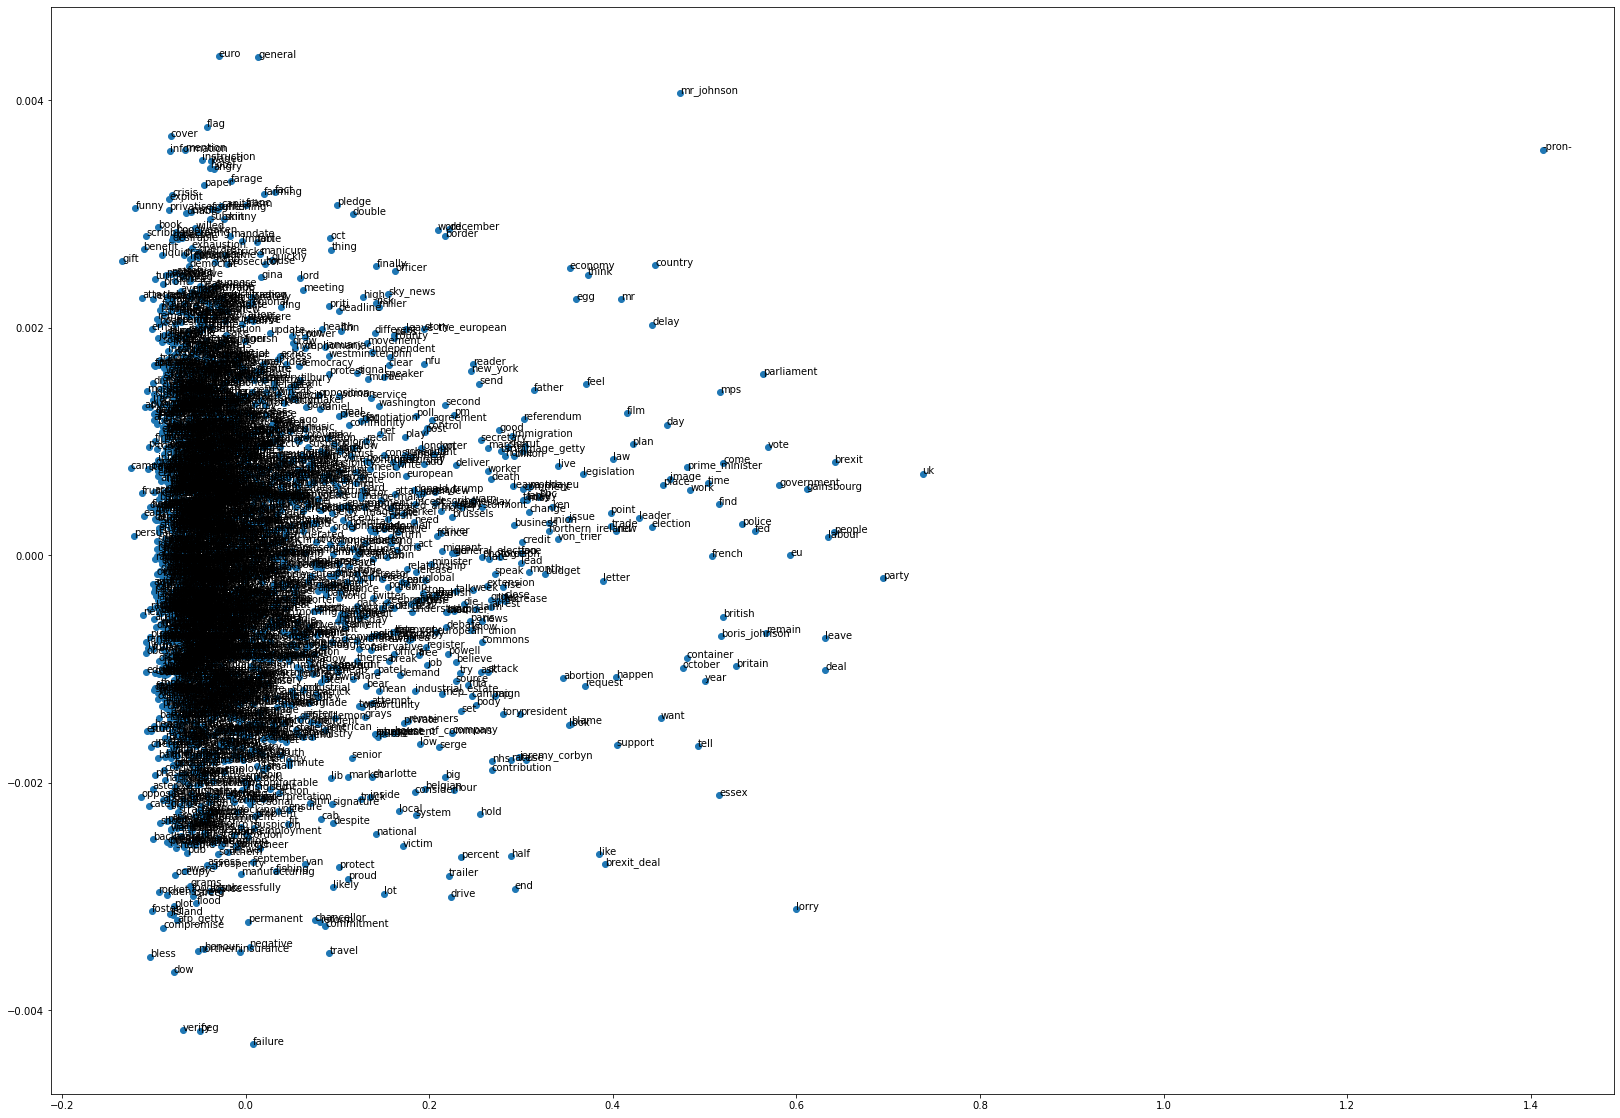

In [631]:
# Run Principal component analysis (PCA) and plot the skipgram model output

data = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(data)
# create a scatter plot of the projection
plt.figure(figsize=(28,20))
plt.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)

for i, word in enumerate(words):
       plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


## Acknowledgement

1. Akshay Kulkarni and Adarsha Shivananda. 2019. Natural Language Processing Recipes. [Chapter 3: Converting Text to Features](https://learning.oreilly.com/library/view/natural-language-processing/9781484242674/html/475440_1_En_3_Chapter.xhtml#)

2. [Sklearn's module on feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html)

In [174]:
def dummy(doc):
    return doc
tfidf_model = TfidfVectorizer(analyzer=dummy, min_df=5, max_df=0.5)

model = tfidf_model.fit(corpus['tokens'])

In [175]:
model

TfidfVectorizer(analyzer=<function dummy at 0x7fd6895dc700>, max_df=0.5,
                min_df=5)

In [179]:
matx=model.transform(corpus['tokens']).todense()

In [182]:

print(matx.shape)

(175, 1)


In [11]:

vectorizer = CountVectorizer()
# tokenizing
vectorizer.fit(news['title'])

# encode document
vector = vectorizer.transform(news['title'])
# summarize & generating output
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vector.toarray())

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
news['tokens']

In [ ]:
# create the transform
vectorizer = CountVectorizer()
# tokenizing
vectorizer.fit(news['token'])
# encode document
vector = vectorizer.transform(news['token'])
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

In [ ]:
# Convert your tokens in the News dataset into a list
news['tokens'] = news['tokens'].apply(lambda token_string: token_string.split('|*|'))
news = news['tokens'].values.tolist()
texts = [[word.lower() for word in text.split()] for text in news]

In [ ]:
# create the transform
vectorizer = CountVectorizer()
# tokenizing
vectorizer.fit(news_brexit_subset['title'])
# encode document
vector = vectorizer.transform(news_brexit_subset['title'])
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

In [ ]:
### Example 

In [ ]:
pd.options.display.max_colwidth = 200
text=news_brexit.iloc[[7,22], [5]]
text

In [ ]:
#Convert a collection of text documents to a matrix of token counts
# create the transform
vectorizer = CountVectorizer()

In [ ]:
news_brexit['title']

In [ ]:
# tokenizing
vectorizer.fit(news_brexit['title'])
# encode document
vector = vectorizer.transform(news_brexit['title'])
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

In [ ]:
# create the transform
vectorizer = CountVectorizer()
# tokenizing
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

In [ ]:
sentences = [['I', 'love', 'nlp'],
                  ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
                  ['nlp', 'is', 'future'],
                  ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
                  ['nlp', 'uses', 'machine', 'learning']]


In [ ]:

corpus = [['Is', 'the', 'Oxford', 'Covid', 'jab', 'safe'],
            ['Does', 'vaccine', 'stop', 'you', 'getting', 'Covid'],
            ['How', 'effective', 'is', 'the', 'Oxford', 'Covid', 'vaccine'],
            ['Who', 'is', 'eligible', 'to', 'get', 'the', 'Covid', 'vaccine']]

In [ ]:
corpus

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# training the model
skipgram = Word2Vec(corpus, size =300, window = 3, min_count=1,sg = 1)
#skipgram = Word2Vec([d[1][0:40]+d[0][0:40]], size =300, window = 3, min_count=1,sg = 1)
print(skipgram)
# access vector for one word
print(skipgram['jab'])

In [ ]:
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
       pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
skipgram.wv.most_similar(positive = "Covid")

In [ ]:
# Load the parsed news dataset 

news = pd.read_csv('sample_news_large_phrased.csv', index_col='index')
news_brexit = df[df['query']=='brexit']

In [ ]:
news_brexit['title'].tail(1)

In [ ]:
pd.options.display.max_colwidth = 200
text=news_brexit.iloc[[7,22], [5]]
text

In [ ]:
pd.options.display.max_colwidth = 200
text=news_brexit.iloc[[7,22], [1]]
text

In [ ]:


text
vectorizer = CountVectorizer(ngram_range=(1,1))


# tokenizing
vectorizer.fit(text["title"])
# encode document
vector = vectorizer.transform(text["title"])

# summarize & generating output
# print(vectorizer.vocabulary_)

print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vector.toarray())

In [ ]:
# create the transform
vectorizer = CountVectorizer(ngram_range=(2,2))
# tokenizing
vectorizer.fit(text['title'])
# encode document
vector = vectorizer.transform(text['title'])
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

In [ ]:
text

In [ ]:
#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Create the transform
vectorizer = TfidfVectorizer()
#Tokenize and build vocab
vectorizer.fit(text['title'])
#Summarize
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vectorizer.idf_)

In [ ]:


text=news_brexit.iloc[[7,22], [5]]
text['tokens']


In [ ]:
text=news_brexit.iloc[[7,22], [5]]
text['tokens']= text['tokens'].apply(lambda token_string: token_string.split('|*|'))



In [ ]:
news['tokens'] =news['tokens'].apply(lambda token_string: token_string.split('|*|'))
d=text['tokens'].values.tolist()

In [ ]:
d=text['tokens'].values.tolist()

In [ ]:
d[1][0:30]+d[0][0:30]

In [ ]:
text['tokens']

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# training the model
skipgram = Word2Vec(text['tokens'], size =300, window = 3, min_count=1,sg = 1)
#skipgram = Word2Vec([d[1][0:40]+d[0][0:40]], size =300, window = 3, min_count=1,sg = 1)
print(skipgram)
# access vector for one word
print(skipgram['brexit'])

In [ ]:
skipgram.similarity('brexit', 'migration')

In [ ]:
skipgram.wv.most_similar(positive = "brexit")

In [ ]:
skipgram.wv.most_similar(positive=['brexit', 'immigrate'], negative=[''])


In [ ]:
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
       pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
result

In [ ]:
[text['title']]

In [ ]:
news_brexit

In [ ]:
for i in range(0,24):
    data=news_brexit.iloc[[i], [1]]
    vectorizer = CountVectorizer(ngram_range=(1,1))


    # tokenizing
    vectorizer.fit(data["title"])
# encode document
    vector = vectorizer.transform(data["title"])

# summarize & generating output
# print(vectorizer.vocabulary_)

    print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
    print(vector.toarray())

In [ ]:


data
vectorizer = CountVectorizer(ngram_range=(1,1))


# tokenizing
vectorizer.fit(data["title"])
# encode document
vector = vectorizer.transform(data["title"])

# summarize & generating output
# print(vectorizer.vocabulary_)

print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vector.toarray())

In [ ]:
# create the transform
# ngram_range of (1, 1) extracts unigrams
# ngram_range of (1, 2) extracts unigrams and bigrams
# ngram_range of (1, 2) extracts bigrams
vectorizer = CountVectorizer(ngram_range=(1,1))


# tokenizing
vectorizer.fit(new['title'].tail(1))
# encode document
vector = vectorizer.transform(new['title'].tail(1))

# summarize & generating output
# print(vectorizer.vocabulary_)

print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))
print(vector.toarray())

In [ ]:
sorted(vectorizer.vocabulary_)
dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1]))


In [ ]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer
# Text
text = ["I love NLP and I will learn NLP in 2month "]
text = ["People's Vote march: from every corner of the land they came, to join a very British rebellion in the rain | Politics | The Guardian"]
# create the transform
vectorizer = CountVectorizer()
# tokenizing
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)
# summarize & generating output
print(vectorizer.vocabulary_)
print(dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])))


print(vector.toarray())


In [ ]:
news = pd.read_csv('sample_news_large_phrased.csv', index_col='index')
news_brexit =df[df['query']=='brexit'].head(5)  




new2 = new['title'].to_numpy

new2
#MobilityTrends[(MobilityTrends['country_region'] == 'United Kingdom') & 
#                            (MobilityTrends['date'] > '2020-03-23') & (MobilityTrends['date'] <= '2020-05-10')]
#MobilityTrends_UKLockdown1.head()


#MobilityTrends[MobilityTrends['country_region']=='United Kingdom']

In [ ]:
df[df['query']=='brexit'].head(3)  

In [ ]:
new['title']

In [ ]:
pd.options.display.max_colwidth = 100

In [ ]:
#df[[:,3],['query']]

df.loc[df.index[[0, 2]], 'query']

In [ ]:
# converting this specific data's tokens column back to a list
df['tokens'] = df['tokens'].apply(lambda token_string: token_string.split('|*|'))

In [ ]:
df

In [ ]:
# Normally the Tfidf Vectorizer would do tokenization and preprocessing for us. 
# As we're passing it pre-processed tokens we can use a dummy function, which simply pretends to
# process the text

def dummy(doc):
    return doc

In [ ]:
# it is recommended to filter out the extreme ends of the vocab. 
# The default is any words used less than 5 times and any word that occurs in more than 50% of the corpus.
# This can be tweaked depending on how succesful yout model is.

#tfidf_model = TfidfVectorizer(analyzer=dummy, min_df=5, max_df=0.5)
tfidf_model = TfidfVectorizer()

In [ ]:
tfidf_model

In [ ]:
# We train our model by fitting it to our entire corpus of tokens
vectorizer.fit(df['title'])

In [ ]:
vectorizer.fit(new['title'].head(5))

In [ ]:
new2

In [ ]:
model

In [ ]:
#Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

In [ ]:
# encode document
vector = vectorizer.transform(text)
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

In [ ]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer
# Text
text = ["Have UK voters changed their minds on Brexit?",
       "EU leaders gather for summit as Boris Johnson scrambles to get backing for Brexit deal",
       "British businesses say new Brexit deal worse than May's agreement"]
# create the transform
vectorizer = CountVectorizer(ngram_range=(1,2))
# tokenizing
vectorizer.fit(new['title'].head(5))
# encode document
vector = vectorizer.transform(new['title'].head(5))
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())



In [ ]:
text = ["I love NLP and I will learn NLP in 2month "]


In [ ]:
text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox and the dog."]

In [ ]:
# create the transform
vectorizer = CountVectorizer(ngram_range=(1,1))
# tokenizing
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())



In [ ]:
#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Create the transform
vectorizer = TfidfVectorizer()
#Tokenize and build vocab
vectorizer.fit(text)
#Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
#TfidfVectorizer(analyzer=dummy, min_df=5, max_df=0.5)

In [ ]:
#Example sentences
sentences = [['I', 'love', 'nlp'],
                  ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
                  ['nlp', 'is', 'future'],
                  ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
                  ['nlp', 'uses', 'machine', 'learning']]
#import library
!pip install gensim
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# training the model
skipgram = Word2Vec(sentences, size =50, window = 3, min_count=1,sg = 1)
print(skipgram)
# access vector for one word
print(skipgram['nlp'])


In [ ]:
print(skipgram['industry'])



In [ ]:
# access vector for another one word
#print(skipgram['deep'])
#KeyError: "word 'deep' not in vocabulary"
#We get an error saying the word doesn’t exist because this word was not there in our input training data. This is the reason we need to train the algorithm on as much data possible so that we do not miss out on words.

#There is one more way to tackle this problem. Read Recipe 3-6 in this chapter for the answer.


# save model
skipgram.save('skipgram.bin')
# load model
skipgram = Word2Vec.load('skipgram.bin')

#T – SNE plot is one of the ways to evaluate word embeddings. Let’s generate it and see how it looks.


# T – SNE plot
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
       pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
skipgram.most_similar(positive=['solves', 'saves'], negative=['problems'])